In [12]:
# imported dependencies
import pennylane as qml
from itertools import product
import numpy as np
import random
qml.version()

'0.28.0'

In [13]:
# generate the density matrix
def generate_density_matrix():

    # this is the hadamard shit
    c1 = 1/np.sqrt(2)
    c2 = 1/np.sqrt(2)
    state = np.array([0.5, 0.5, 0.5, 0,0,0,0.5,0])
    
    rho = np.outer(state, np.conj(state).T)
    return rho


In [14]:
def matrices_commute(A, B):
    commutator = np.dot(A, B) - np.dot(B, A)
    return np.allclose(commutator, np.zeros_like(commutator))

In [15]:

dev = qml.device("default.mixed", wires=3)

@qml.qnode(dev)
def generate_noise(wires):
    density_matrix = generate_density_matrix()
    qml.QubitDensityMatrix(density_matrix, wires=wires)
    qml.BitFlip(0.75,wires[0])
    qml.BitFlip(0.35,wires[1])
    qml.BitFlip(1,wires[2])
    return qml.density_matrix(wires)


In [16]:

# Assume rho is equal to rho det because the state is in the codespace
rho_det = generate_density_matrix()


In [17]:

# Create observable O
O = qml.Identity(0) @ qml.Identity(1) @ qml.PauliZ(2)
O = O.matrix()


In [18]:
# create rho with noise applied
rho =  generate_noise([0,1,2])

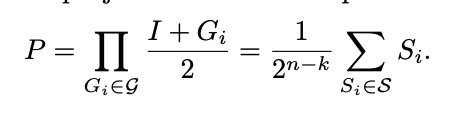

In [19]:
# Detect if bit 1 or bit 2 flipped
g1_kron = qml.PauliZ(0) @ qml.PauliZ(1) @ qml.Identity(2)
g1_kron = g1_kron.matrix()

g2_kron = qml.Identity(0) @ qml.PauliZ(1) @ qml.PauliZ(2)
g2_kron = g2_kron.matrix()

I = qml.Identity(0) @ qml.Identity(1) @ qml.Identity(2)
I = I.matrix()

#
p1 = 0.5 * (I + g1_kron)
p2 = 0.5 * (I + g2_kron)

P = p1 @ p2

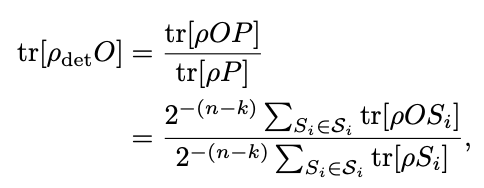

In [20]:
# Compute tr[p_det @ O]
num = np.trace(rho @ O @ P)
denom = np.trace(rho @ P)
print("tr[pOP]")
print(num)
print("tr[pP]")
print(denom)
print("tr[pOP] / tr[pP]")
print(num/denom)

tr[pOP]
(-0.1875000000000074+0j)
tr[pP]
(0.26875000000001525+0j)
tr[pOP] / tr[pP]
(-0.6976744186046392+0j)


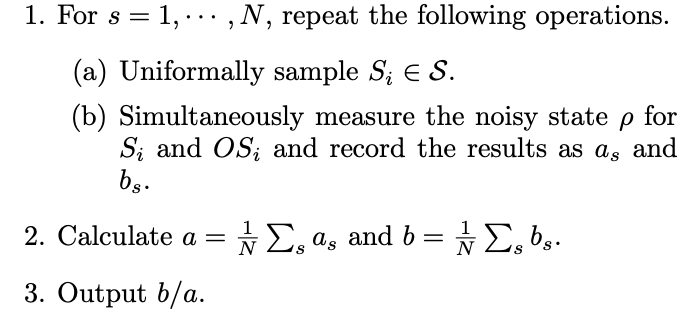

In [11]:
N = 500
G1 = qml.Identity(0) @ qml.PauliZ(1) @ qml.PauliZ(2)
G2 = qml.PauliZ(0) @ qml.PauliZ(1) @ qml.Identity(2)

G1 = G1.matrix()
G2 = G2.matrix()
S = [G1, G2, G1 @ G2, I]
a = 0
b = 0

print("Observable Oand Projector P Commute: ")
print(matrices_commute(O,P))
for i in range(N):
    Si = random.sample(S,1)[0]
    a_s = np.trace(rho @ Si)
    b_s = np.trace(rho @ O @ Si)
    a += a_s
    b += b_s

print("b / a (Expectation value of Observable O)")
print(b/a)

Observable Oand Projector P Commute: 
True
b / a (Expectation value of Observable O)
(-0.6992746884879929+0j)
